Step 1 - Business Understanding

In [ ]:
#Business Problem: Predict medical insurance charges using personal and lifestyle attributes
#Goal: Build a regression model that accurately estimates medical costs for individuals
#Usefulness: Helps insurers analyse cost drivers, set premiums, and identify high-risk groups
#Task type: Supervised learning - regression (predicting a continuous value: charges)

Step 2 - Data Understanding

In [1]:
#Import libraries
#Import pandas for data loading and manipulation
import pandas as pd

#Import numpy for numerical operations
import numpy as np

#Import matplot for basic visualisations
import matplotlib.pyplot as plt

#Import seaborn for easier statistical visualisations
import seaborn as sns

#Enable inline plotting in the notebook
%matplotlib inline

In [2]:
#Load the dataset from a CSV file into a pandas DataFrame
#Make sure the file "insurance.csv" is uploaded in the same file
df = pd.read_csv('insurance.csv')

#Display the first 5 rows to get a quick look at the data
print("First 5 rows of the dataset:")
print(df.head())

#Show basic information about the Dataframe (columns, data types, non-null counts)
print("\nDataset info:")
print(df.info())

#Show basic descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical features")
print(df.describe())

#Check for missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descriptive statistics for numerical features


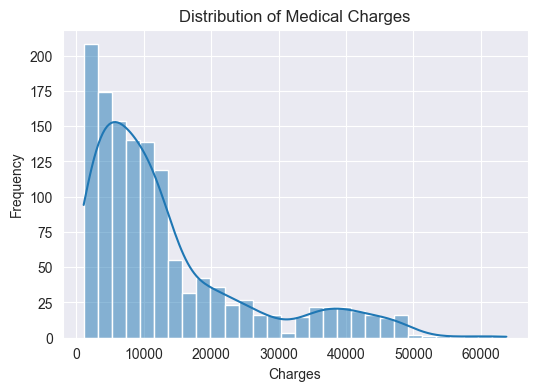

In [5]:
#Plot a histogram for the target variable "charges" to inspect its distribution
#Set the size of the figure
plt.figure(figsize=(6,4))
#Plot histogram with kernel density estimate
sns.histplot(df["charges"], kde=True)
#Set the title of the plot
plt.title("Distribution of Medical Charges")
#Label the x-axis
plt.xlabel("Charges")
#Label the y-axis
plt.ylabel("Frequency")
#Display the plot
plt.show()

Step 3 - Data Preparation

In [6]:
#Display the column names to understand which are categorical and numerical
print("\nColumns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [7]:
#Numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:")
print(numerical_cols)

Numerical columns:
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [8]:
#Categorical columns
categorical_cols = df.select_dtypes(include=['object','category','bool']).columns
print("\nCategorical columns:")
print(categorical_cols)


Categorical columns:
Index(['sex', 'smoker', 'region'], dtype='object')


In [9]:
#Identify categorical columns
categorical_cols = ["sex", "smoker", "region"]


In [11]:
#Identify numerical columns by taking all columns except categorical and target
numerical_cols = [col for col in df.columns if col not in categorical_cols + ["charges"]]

#Print categorical and numerical column lists for verification
print("\nCategorical columns:")
print(categorical_cols)
print("\nNumerical columns:")
print(numerical_cols)


Categorical columns:
['sex', 'smoker', 'region']

Numerical columns:
['age', 'bmi', 'children']


In [12]:
#Use pandas get_dummies to one-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)